In [12]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


In [13]:
df=pd.read_csv('/content/Assignment-1_Data.csv',sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
df.head(3)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [16]:
df['Price']=df['Price'].str.replace(",",".")

In [17]:
df['Price']=df['Price'].astype("float64")

In [18]:
df.dtypes

BillNo         object
Itemname       object
Quantity        int64
Date           object
Price         float64
CustomerID    float64
Country        object
dtype: object

In [24]:
day = "2012-01-01"
day = pd.to_datetime(today)
df["Date"] = pd.to_datetime(df["Date"])

In [25]:
rec= df.groupby(["CustomerID"]).agg({"Date": lambda x: ((day - x.max()).days)})
rec.columns = ["Recency"]



In [23]:
rec.head(4)

,Recency
CustomerID,
12346.0,347
12347.0,61
12349.0,40
12350.0,332


In [29]:
freq = df.drop_duplicates(subset = "BillNo").groupby(["CustomerID"])[["BillNo"]].count()
freq.columns = ["Frequency"]
freq.head()

,Frequency
CustomerID,
12346.0,1
12347.0,7
12349.0,1
12350.0,1
12352.0,8


In [26]:
#monetary values

df["Total"]=df["Quantity"]*df["Price"]

In [27]:
money = df.groupby(["CustomerID"])[["Total"]].sum()
money.columns = ["Monetary"]
money.head()

,Monetary
CustomerID,
12346.0,77183.60
12347.0,4310.00
12349.0,1757.55
12350.0,334.40
12352.0,2506.04


In [30]:
RFM=pd.concat([rec,freq,money],axis=1)

In [31]:
RFM.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,61,7,4310.00
12349.0,40,1,1757.55
12350.0,332,1,334.40
12352.0,94,8,2506.04
12353.0,226,1,89.00
12354.0,254,1,1079.40
12355.0,117,1,459.40
12356.0,44,3,2811.43


In [32]:

#RFM Modeling


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(RFM)



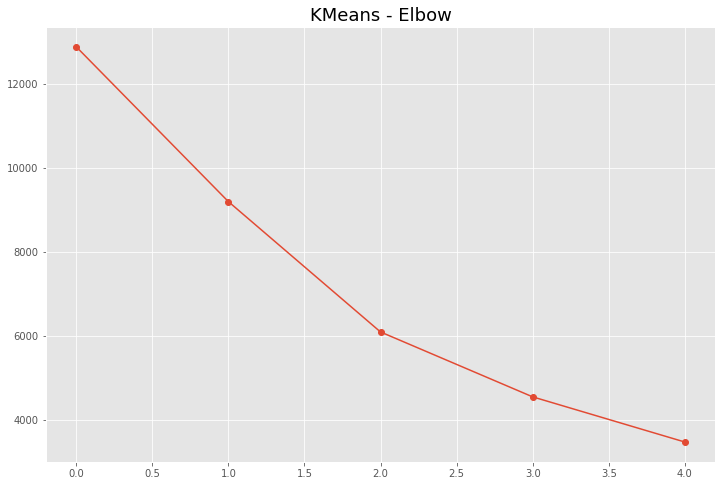

In [33]:
inertia = []

from sklearn.cluster import KMeans
for i in np.arange(1,6):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize = (12,8))    
plt.plot(inertia, marker = "o")
plt.title("KMeans - Elbow", fontsize = 18);

In [34]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled)
RFM["Cluster_No"] = (kmeans.labels_ + 1)

In [35]:
RFM.head(10)

,Recency,Frequency,Monetary,Cluster_No
CustomerID,,,,
12346.0,347,1,77183.60,3
12347.0,61,7,4310.00,1
12349.0,40,1,1757.55,1
12350.0,332,1,334.40,2
12352.0,94,8,2506.04,1
12353.0,226,1,89.00,2
12354.0,254,1,1079.40,2
12355.0,117,1,459.40,1
12356.0,44,3,2811.43,1


In [39]:


group=RFM.groupby(["Cluster_No"])[["Recency", "Frequency", "Monetary"]].mean()

group

,Recency,Frequency,Monetary
Cluster_No,,,
1,68.634429,4.797872,1913.384218
2,281.745299,1.545299,495.484189
3,48.760000,58.960000,81979.682000


In [45]:
def func (row):
    if row['Cluster_No'] ==1:
        return 'Good Standing Cx'
    elif row['Cluster_No']==2:
        return 'Lapsed Customers'
    else:
        return 'Whales'

In [47]:
RFM['Condition']=RFM.apply(func,axis=1)

In [49]:
RFM

,Recency,Frequency,Monetary,Cluster_No,Condition
CustomerID,,,,,
12346.0,347,1,77183.60,3,Whales
12347.0,61,7,4310.00,1,Good Standing Cx
12349.0,40,1,1757.55,1,Good Standing Cx
12350.0,332,1,334.40,2,Lapsed Customers
12352.0,94,8,2506.04,1,Good Standing Cx
...,...,...,...,...,...
18280.0,181,1,180.60,2,Lapsed Customers
18281.0,25,1,80.82,1,Good Standing Cx
18282.0,237,2,178.05,2,Lapsed Customers


In [52]:
RFM['Condition'].value_counts()

Good Standing Cx    3102
Lapsed Customers    1170
Whales                25
Name: Condition, dtype: int64

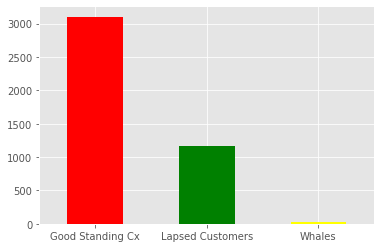

In [51]:

result=RFM['Condition'].value_counts()
result.plot(kind='bar',rot=0, color=['Red','Green','Yellow'])